In [1]:
from base import *

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.preprocessing import image

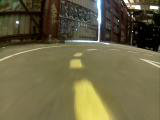

In [5]:
images_folder_path = './data/one_lap/'
img_list = glob.glob(os.path.join(images_folder_path,'*.jpg'))
img = Image.open(os.path.join(img_list[0]))
img_arr = np.array(img)
img

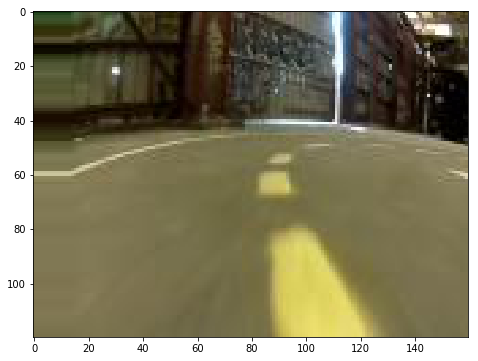

In [9]:
new_arr = image.random_shift(img_arr, .1, .1)
plt.imshow(new_arr)

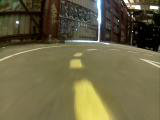

In [97]:
def random_channel_shift(x, intensity, channel_axis=0):
    x = np.rollaxis(x, channel_axis, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_channel + np.random.uniform(-intensity, intensity), min_x, max_x)
                      for x_channel in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

In [216]:

hsv = cv2.cvtColor(img_arr, cv2.COLOR_RGB2HSV) #convert it to hsv

hsv.shape


(120, 160, 3)

In [271]:
h2 = hsv[:, :, 1] +100
type(hsv)

numpy.ndarray

In [272]:
h2[:10]

array([[166, 111,  80, ..., 121, 167, 243],
       [130,  98,  79, ..., 142, 174, 243],
       [114,  95,  86, ..., 121, 176, 243],
       ..., 
       [199, 189, 178, ..., 254,   4,  15],
       [190, 150, 126, ...,   2,  15,  34],
       [150, 112,  94, ...,  18,  27,  64]], dtype=uint8)

In [268]:
h2 = h2.clip(0, 255)
hsv[:, :, 1] = h2.astype(int)

In [269]:
hsv[:, :, 1].mean()

178.26854166666666

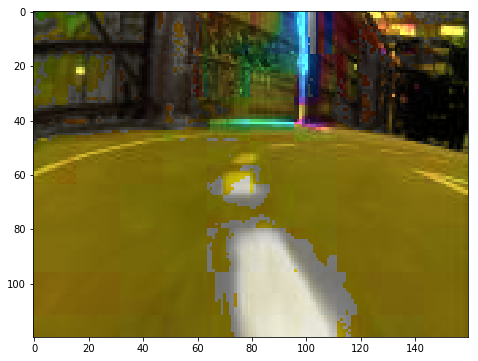

In [270]:

new_arr = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(new_arr)

In [259]:
hsv.mean()

89.185972222222219